# Predicting Annual Salary for Data Science and STEM Roles based on LEVELS.FYI Data

Author: Yu Yuen Hern

GitHub: [yuenherny](https://github.com/yuenherny)

### Determine business objectives

-------------
<b> Background, overview and motivation: </b>
Tech-related jobs has been booming when technology went mainstream, especially data scientist role.

According to the Glassdoor 2022, data scientist rank the top 3 best job in America for 7 years running. This ranking is based on the career opportunites rating, number of opening jobs, and the average salaries. The median base salary is $120,000. The job opening were also spiking up from 1,736 in 2016 to 10,071 in 2022. 

However, the ecosystem does not depend on just data scientist alone, it involves upstream and downstream job roles - like product/project managers and software engineers. These jobs are equally important to ensure the democratization of technology to average users. Hence, many people flocked to tech industry.

Unfortunately, the compensation structure vary from one company to another, and was not accessible equally to everyone. [Levels.fyi](https://www.levels.fyi/) was started to democratize the access of information to compensation structure across tech jobs.

*We want to expand this effort by creating an AI model (and subsequently a web app) that enable users to know the estimated annual compensation based on user inputs like year, company, level, title, location, years of experience, years at company and gender.*

-------------
<b> Business objective: </b>
To predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

-------------
<b> Business success criteria: </b> 
A web app that enables user to know the annual compensation based on their input like year, company, level, title, location, years of experience, years at company and gender. and for the next 5 years

-------------
<b> Related works: </b> 

<b> 1. Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study </b><br>
This paper study predict the salary of IT jobs using data from Tecnoempleo, an e-Recruitment website. The result shows that experience, job stability or certain roles contribute significantly to the salary. Besides, decision trees yield a bettery accuracy (84%) than voting committe based tools.

<b> 2. Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA </b> <br>
The paper study the effects of gender, rank and speciality of the acedemic medical centers in the Western USA. among the 799 faculty members, it is found that male are paid significantly higher than feamle in general surgery and obstetrics and gynaecology. It is estimated female are paid ~$75,000 lower than their male colleague.

### Situation Assessment

xx

### Determine data mining goal and success criteria

Goals:
- **Create a ML model that is able to predict the annual salary based on user input with MAE <= 1000, RMSE <= 1, Pearson >= 0.9, R2 >= 0.9 (Primary outcome)**
- Create a ML model that is able to predict the annual salary for the same role in the next 5 years (Optional)
- Deploy the ML model into a web app which outputs estimated annual salary to the user, which automatically retrains with new data (Optional)

### Project plan

Initial assessment of tools and techniques:
1. Tools: 
   - Pandas
   - Matplotlib
   - Pandas-profiling
   - Scikit-learn
   - Missingno
   - PyTorch (optional)
   - Streamlit (optional)
   - Heroku (optional)
2. Techniques:
   - CRISP-DM
   - Machine learning
   - Deep learning (optional)

### Some interesting questions to be answered during analysis

1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. Many people thinks that you don’t need a degree to work in these tech companies. Is this true?
3. Are women underpaid in these companies?
4. Are non-whites paid lower than whites in these companies?
5. Does years in company affect value of granted stock and bonus?
6. For the same position or job level, does location affect base salary regardless of gender and race?
7. What are the factors impacting the salary of a data scientist?
8. What is the salary trend for data scientist? and its comparison to living cost?
9. What is the predicted salary for Data Scientist in next 5 years?

Surprisingly, the data from [Kaggle](https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries) is different from the latest data pulled from LEVELS.FYI official [JSON API](https://www.levels.fyi/js/salaryData.json) hence we could not answer Question 2, 4 and partially 6 - perhaps to avoid educational and race discrimination.

## From Section 2: Data Understanding

Let's open the HTML file in another browser tab to see the report.

#### Overview section
In the Overview tab, we see:
- 0 missing cells
- 0 duplicate rows
- 1 datetime variable, 8 categorical variables and 8 numeric variables

In the Alerts tab, we see:
- company, level, location, tag, otherdetails, dmaid has high cardinality which means there are many distinct values
- a bunch of features that has high correlation with each other (we check that more in feature selection later)
- totalyearlycompensation, basesalary, stockgrantvalue and bonus are highly skewed
- totalyearlycompensation, yearsofexperience, yearsofcompany, basesalary, stockgrantvalue, and bonus has a substantial percentage of zeros

From here, we get a more deeper glance on how the data look like.

#### Variables section
- timestamp: Minimal entries from 2017 to 2018, but increase in trend after that
- company: Most entries in sequence - Amazon, Microsoft, Google, Facebook, Apple
- level: Most entries are L4, L5 then L3. 
- title: Ignored as job title is too unstructured and job grade has been reflected in `level`
- totalyearlycompensation: As indicated in "Alerts", this variable is highly correlated and skewed. This require extensive checks and cleaning later especially for entries not following the XXXk convention
- location: Most of the jobs are in (sequence) Seattle WA, San Francisco CA, New York NY, Redmond WA and Mountain View CA. Require checking on correlation with target variable
- yearsofexperience: There are uncommon extreme values - 90 years of experience, outlier removal needed
- tag: Most common entries are "full stack", "distributed system", "API dev", "ML/AI" and "web dev". Surprisingly ML/AI falls at 4th place hence we can deduce that not all jobs are all ML/AI, there are still a lot of software jobs as well
- basesalary, stockgrantvalue, bonus: Ignored as this is part of `totalyearlycompensation`. Just require checking that the sum equals `totalyearlycompensation` 
- gender: Mostly male, then followed by blanks then female. Require check if this feature is highly correlated with pay.
- otherdetails: Ignored as this is too unstructured
- cityid: Not really familiar with US city ID. Require further research and checking if correlated to target variable
- dmaid: Referring to [Nielsen's Designated Market Areas](https://www.facebook.com/business/help/1501907550136620). Require checking if DMA name aligned with `cityid` and `location`.
- rownumber: Ignored as this is just instance ID. However, further checking required.

#### Correlations section (Only for numeric variables)
Note: Ignore basesalary, stockgrantvalue and bonus as the summation of three equals totalyearlycompensation.
1. Spearman's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
2. Pearson's: totalyearlcompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
3. Kendall's: totalyearlycompensation is...
   - Correlated with yearsofexperience
   - Slightly correlated with yearsatcompany
4. Phik: totalyearlycompensation is...
   - Slightly correlated with yearsofexperience and yearsatcompany
   - Slightly to no correlation with gender
   - Ignore cityid as cityid is not an ordinal data
   
#### Missing values
There are no missing values.


#### What we should do next:
1. totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data
2. yearsofexperience
   - Check for extreme values - >40 years experience - check whether aligns with job grade
   - Plot totalyearlycompensation with yearsofexperience for each company
3. yearsatcompany
   - Check for extreme values - >40 years at company - check whether aligns with job grade
   - Decide if remove extreme value
   - Plot totalyearlycompensation with yearsofexperience for each company
4. gender
   - Plot histogram for entry frequency - to check imbalanced data
   - Decide to replace values other than Male and Female to Unknown or other values
5. companies
   - Plot frequency of entries for all companies - to check imbalanced data
   - Plot average and median totalyearlycompensation of each company - to check if there are substantial salary difference across company
   - Plot average and median totalyearlycompensation for all job locations for each company
   - Check company name for consistency - using data index
6. level
   - Study how US tech company job ranks - to change job titles into corresponding job ranks
   - Plot average and median totalyearlycompensation for each job level across companies - to check if there are substantial salary difference for the same job grade across companies
   - Plot the frequency of each job grade - to check imbalanced data
7. location
   - Plot in map the number of entries for each location - to check which location has most entries
   - Tabulate the number of entries in a table - row: companies, column: location - to check if each companies has multiple locations
   - Plot average and median totalyearlycompensation for each location
   - Check for typo in location name
8. cityid, dmaid
    - Study how US city and DMA ID works
    - Check if aligns with the location and real city
9. tag
   - Check for percentage of blanks - decide if to include in analysis or not
   - Plot totalyearlycompensation wrt tags and job grade - to check for same job grade, is there salary difference for different job domain
10. title
    - Ignored
11. otherdetails
    - Ignored
12. timestamp
    - extract year into new column

In [2]:
import pandas as pd
import requests
data = requests.get('https://www.levels.fyi/js/salaryData.json').json()
df = pd.DataFrame(data)

From the dataframe above, we have the following features:
1. timestamp: Date and time when the details was submitted
2. company: Hiring company
3. level: Job grade
4. title: Job title
5. totalyearlycompensation: Annual salary including base salary, value of granted stock and bonus
6. location: Location of the job
7. yearsofexperience: Total number years of experience
8. yearsatcompany: Total number of years in the company
9. tag: NA
10. basesalary: Basic salary
11. stockgrantvalue: Value of granted stock
12. bonus: Total bonus
13. gender: Gender/sex of the hiree
14. otherdetails: Other details submitted
15. cityid: ID of the city where the job was located
16. dmaid: DMA (Designated Market Area) regions are the geographic areas in the U.S. in which local television viewing is measured by Nielsen
17. rowNumber: Instance ID

In [3]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

for feature in ['cityid', 'dmaid', 'gender']:
    df[feature] = df[feature].astype('category')

for feature in ['totalyearlycompensation', 'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue', 'bonus']:
    df[feature] = pd.to_numeric(df[feature])

## 3. Data Preparation

### Data Cleaning

Before the data is suitable to be explored, we need to ensure the data has been cleaned.

#### Removing irrelevant features

To make the dataset simpler, we remove:
- tag: Too unstructured, hard to clean. But will be useful for job scope analysis
- otherdetails: Too unstructured, hard to clean
- rowNumber: Same with dataframe index

In [4]:
df = df.drop(columns=['tag', 'otherdetails', 'rowNumber'])
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807
1,2017-06-10 17:11:29,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2021-08-17 08:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female,11527,819
62638,2021-08-17 08:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male,9606,560
62639,2021-08-17 08:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male,7422,807
62640,2021-08-17 08:26:21,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,72,0,14,,10182,501


#### Extract year from timestamp

We need the year of data submission, hence we extract the year from timestamp first.

In [5]:
df['year'] = df['timestamp'].dt.year
df = df.drop(columns=['timestamp'])
df.head()

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807,2017
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807,2017
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819,2017
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819,2017
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0,2017


In [14]:
df.iloc[20636].index

Index(['company', 'level', 'title', 'totalyearlycompensation', 'location',
       'yearsofexperience', 'yearsatcompany', 'basesalary', 'stockgrantvalue',
       'bonus', 'gender', 'cityid', 'dmaid', 'year'],
      dtype='object')

#### Extract city and country from location

Extracting country and city from strings are complicated and not as straightforward as using delimiters, especially when US-based locations do not include country in their location.

Let's use `geopy` instead.

In [6]:
# to demonstrate geopy

# from geopy.geocoders import Photon

# geolocator = Photon()
# loc_dict = geolocator.geocode(df.loc[0, 'location']).raw
# loc_dict
# print(type(loc_dict))
# print(loc_dict['properties']['country'])
# print(loc_dict['properties']['city'])

Now we create a function that returns country and city

In [7]:
'''
These code are executed on Colab to save time and resources
'''

# from geopy.geocoders import Photon

# def get_country_city(location: str, country_or_city: str, loc_list: list):
    
#     from IPython.display import clear_output
#     clear_output(wait=True)
#     print(len(loc_list)+1, "/", 62642)
#     geolocator = Photon()
#     try:
#         loc_dict = geolocator.geocode(location, language='en').raw
#     except:
#         loc_dict = {'geometry': {'coordinates': ['NA', 'NA'], 'type': 'Point'},
#          'type': 'Feature',
#          'properties': {'osm_id': 'NA', 'osm_type': 'NA', 'country': 'NA', 'osm_key': 'NA',
#           'city': 'NA', 'countrycode': 'NA', 'osm_value': 'NA', 'postcode': 'NA', 'name': 'NA',
#           'county': 'NA', 'state': 'NA', 'type': 'NA'}}
    
#     if country_or_city == 'country':
#         try:
#             country = loc_dict['properties']['country']
#             print(country)
#             return country, loc_list.append(country)
#         except:
#             country = 'No country'
#     elif country_or_city == 'city':
#         try: 
#             city = loc_dict['properties']['city']
#             print(city)
#             return city, loc_list.append(city)
#         except:
#             city = 'No city'
#             print(city)
#     else:
#         return "Incorrect input in country_or_city. Choose either 'country' or 'city'"

# Try out the function
# loc_list = []
# get_country_city(df.loc[1, 'location'], 'city', loc_list)

# Execute the function onto the selected column
# city_list_1 = []
# df['location'].apply(lambda x: get_country_city(x, 'city', city_list_1))
# df_country = pd.DataFrame(country_list_1)
# df_country.to_csv('country_list-1.csv')

'\nThese code are executed on Colab to save time and resources\n'

Now, we merge the country and city into the dataframe.

In [19]:
df_country = pd.read_csv('country_list.csv')
df_city = pd.read_csv('city_list.csv')

In [21]:
df['country'] = df_country['0']
df['city'] = df_city['0']
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,city
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807,2017,United States,Redwood City
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807,2017,United States,No city
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819,2017,United States,No city
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819,2017,United States,No city
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0,2017,Canada,Vancouver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female,11527,819,2021,United States,No city
62638,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male,9606,560,2021,United States,Durham
62639,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male,7422,807,2021,United States,No city
62640,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,72,0,14,,10182,501,2021,United States,New York


In [25]:
'''
Since geopy service has issues with city, alternatively we do string manipulation 
'''
df['country'] = df['location'].apply(lambda x: x.split(', ')[2] if len(x.split(', ')) >2 else "US")
df['state'] = df['location'].apply(lambda x: x.split(', ')[1])
df['city'] = df['location'].apply(lambda x: x.split(', ')[0])

In [26]:
df

,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,cityid,dmaid,year,country,city,state
0,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,160,17,9,,7392,807,2017,US,Redwood City,CA
1,eBay,SE 2,Software Engineer,0,"San Francisco, CA",3,4,0,0,0,,7419,807,2017,US,San Francisco,CA
2,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,126,0,0,,11527,819,2017,US,Seattle,WA
3,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,92799,55371,23178,,11521,819,2017,US,Redmond,WA
4,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,156335,0,57840,,1320,0,2017,Canada,Vancouver,BC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,176,51,45,Female,11527,819,2021,US,Seattle,WA
62638,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,43,0,7,Male,9606,560,2021,US,Durham,NC
62639,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,179,7,14,Male,7422,807,2021,US,San Jose,CA
62640,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,72,0,14,,10182,501,2021,US,New York,NY


#### Cleaning up gender column

In [21]:
df['gender'].value_counts()

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

There are 4 distinct values in `gender` column: Male, (Blank), Female, Other and Title: Senior Software Engineer. Let's change (Blank) and Title: Senior Software Engineer to Unknown

In [22]:
df['gender'] = df['gender'].apply(lambda x: 'Unknown' if (x == '') or (x == 'Title: Senior Software Engineer') else x)
df['gender'].value_counts()

Male       35702
Unknown    19541
Female      6999
Other        400
Name: gender, dtype: int64

#### Cleaning up level column

In [24]:
df['level'].value_counts()

L4                          5008
L5                          4861
L3                          3331
L6                          2866
Senior Software Engineer    1433
                            ... 
Senior Consultant 2            1
Fullstack Engineer             1
New grad                       1
Jr Software Engineer           1
DS II                          1
Name: level, Length: 3074, dtype: int64

#### Making company column consistent

#### For totalyearlycompensation, basesalary, stockgrantvalue, bonus
   - Examine extreme (0 and large) values and check the for reported salary on the Internet for that particular job grade, and then decide if needed to be removed
   - Ensure values are consistent following XXXk format
   - Plot histogram for entry frequency - to check if there are imbalanced data

In [248]:
'''
Examine extreme (zero compensation) values and check the for reported salary 
on the Internet for that particular job grade, and then decide 
if needed to be imputed or removed
'''

df_zero_salary = df.loc[:, ['year', 'company', 'level', 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']][(df['totalyearlycompensation'] == 0)]
print('{percent:.2f}% of the data with zero compensation'.format(percent=len(df_zero_salary)/len(df)*100))
df_zero_salary.head()

3.67% of the data with zero compensation


,year,company,level,totalyearlycompensation,basesalary,stockgrantvalue,bonus
1,2017,eBay,SE 2,0,0,0,0
6,2017,Microsoft,60,0,0,0,0
8,2017,Microsoft,63,0,0,0,0
12,2017,Microsoft,59,0,0,0,0
17,2017,Microsoft,63,0,0,0,0


In [249]:
df_zero_salary['year'].value_counts()

2019    1568
2018     697
2017      28
2020       4
Name: year, dtype: int64

<AxesSubplot:>

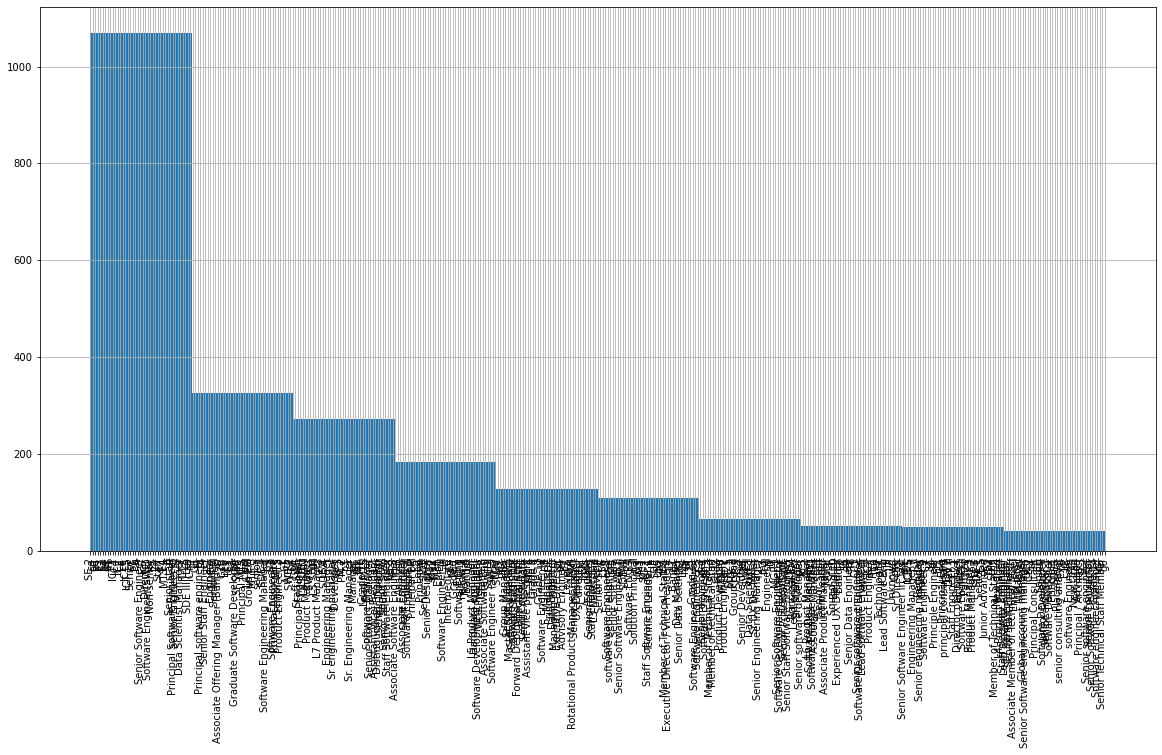

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
df_zero_salary['level'].hist(xrot=90)

Most of the zero compensation entries are from 2019.

**It is impossible for engineers with zero compensation. These data will be removed (3.67%) as imputation is too complicated at the moment due to the wide range of job levels.**

In [251]:
df = df[df['totalyearlycompensation'] != 0]
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,year
0,2017-06-07 11:33:27,Oracle,L3,Product Manager,186,"Redwood City, CA",1,1,,160,17,9,,,7392,807,1,2017
2,2017-06-11 14:53:57,Amazon,L7,Product Manager,126,"Seattle, WA",10,0,,126,0,0,,,11527,819,3,2017
3,2017-06-14 21:22:25,Microsoft,64,Software Engineering Manager,171348,"Redmond, WA",13,13,,92799,55371,23178,,,11521,819,5,2017
4,2017-06-16 10:44:01,Amazon,L5,Software Engineer,214175,"Vancouver, BC, Canada",13,1,,156335,0,57840,,,1320,0,6,2017
5,2017-06-17 00:23:14,Apple,M1,Software Engineering Manager,423,"Sunnyvale, CA",6,6,,157,219,47,,,7472,807,7,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,2021-08-17 08:16:36,Amazon,L6,Product Manager,272,"Seattle, WA",7,0,Analytic,176,51,45,Female,scrielt schwists fuech xauem typaiarty siids q...,11527,819,83870,2021
62638,2021-08-17 08:22:17,Fidelity Investments,L3,Software Engineer,50,"Durham, NC",0,0,Full Stack,43,0,7,Male,pauss jiusts liaop rhiitts proing smiodly splu...,9606,560,83871,2021
62639,2021-08-17 08:24:56,Cisco,Grade 8,Software Engineer,200,"San Jose, CA",3,6,Networking,179,7,14,Male,triasm froidy peusk juieck skaorr,7422,807,83872,2021
62640,2021-08-17 08:26:21,HSBC,GCB5,Software Engineer,86,"New York, NY",10,5,Full Stack,72,0,14,,hypoiarly khoiarts krol sqierg,10182,501,83874,2021


Text(0, 0.5, 'Frequency')

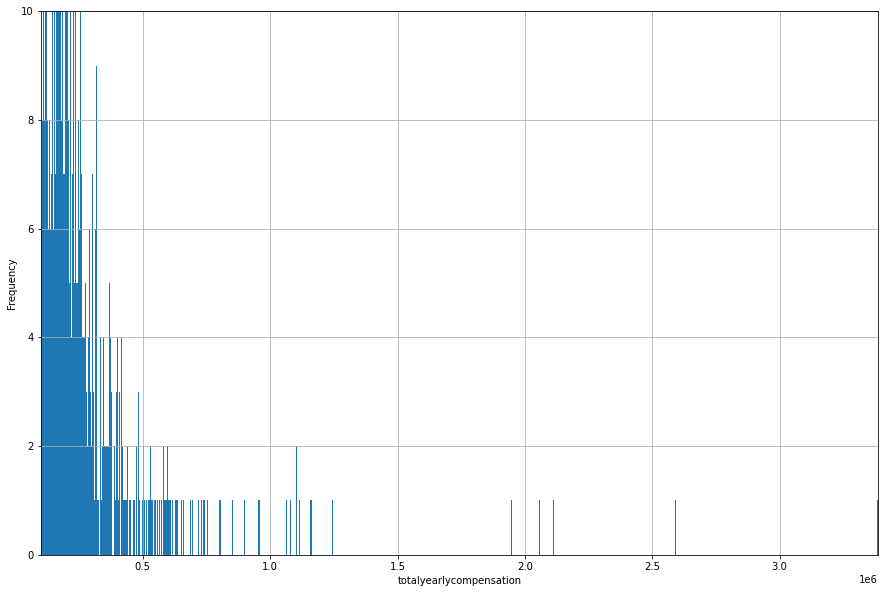

In [252]:
'''
Examine for extreme (large compensation) values and check the for reported salary 
on the Internet for that particular job grade, and then decide 
if needed to be imputed/removed
'''

df['totalyearlycompensation'].hist(bins=1000, figsize=(15, 10))
plt.xlim([100000, max(df['totalyearlycompensation'])])
plt.ylim([0, 10])
plt.xlabel("totalyearlycompensation")
plt.ylabel("Frequency")

Most values are before 1e6. Hence for the threshold to check extremely large values can be set as 1e6.

In [253]:
large_salary_threshold = 20000
df_large_salary = df.loc[:, ['year', 'company', 'level', 'totalyearlycompensation', 'basesalary', 'stockgrantvalue', 'bonus']] \
    [(df['totalyearlycompensation'] <= large_salary_threshold)]
print('{percent:.2f}% of the data with small compensation'.format(percent=len(df_large_salary)/len(df)*100))
df_large_salary

98.77% of the data with small compensation


,year,company,level,totalyearlycompensation,basesalary,stockgrantvalue,bonus
0,2017,Oracle,L3,186,160,17,9
2,2017,Amazon,L7,126,126,0,0
5,2017,Apple,M1,423,157,219,47
9,2017,Microsoft,65,302,192,61,49
10,2017,Microsoft,62,121,105,7,9
...,...,...,...,...,...,...,...
62637,2021,Amazon,L6,272,176,51,45
62638,2021,Fidelity Investments,L3,50,43,0,7
62639,2021,Cisco,Grade 8,200,179,7,14
62640,2021,HSBC,GCB5,86,72,0,14


In [254]:
df_large_salary.sort_values(by='totalyearlycompensation').tail(30)

,year,company,level,totalyearlycompensation,basesalary,stockgrantvalue,bonus
4213,2019,Yandex,G15,4598,29,0,4569
57241,2021,Facebook,E9,4680,221,4268,191
1049,2018,Deloitte,Manager,5362,101,0,5261
7234,2019,Evernote,Mid Senior,5619,131,0,5488
8041,2019,Capital One,Principal Associate,5660,111,0,5549
6496,2019,GE Digital,Senior SWE,5756,162,0,5594
4922,2019,Oracle,IC-2,6029,55,5974,0
60436,2021,Facebook,E9,6129,271,5716,142
6293,2019,Pivotal,P2,7582,101,7481,0
6372,2019,SurveyMonkey,L2,7766,182,0,7584


Notice that the way the data was entered was not consistent.

basesalary was entered in the form of `xxx k` but stockgrantvalue and bonus are normally in its real value `xxx, xxx`.

Hence we should instead rectify basesalary, stockgrantvalue and bonus, and then add all of them to form totalyearlycompensation. 

In [255]:
df.loc[:, 'basesalary'][df['basesalary'] < 1000].value_counts().head(60)

105    437
112    407
115    404
111    398
94     391
95     390
96     390
104    388
117    387
101    385
88     385
114    385
126    382
102    380
97     380
113    379
90     378
140    375
131    372
87     371
85     370
118    369
93     369
107    369
139    368
109    368
110    367
103    367
124    364
122    364
121    364
99     363
147    362
127    362
108    362
83     361
91     360
98     359
129    358
123    358
120    357
119    354
116    353
125    352
132    352
152    352
142    351
137    349
128    343
89     342
100    342
154    341
151    341
136    341
106    340
141    339
80     339
153    338
130    337
148    336
Name: basesalary, dtype: int64

basesalary that is less than 1000, will be multiplied by 1000.

In [256]:
df['basesalary'] = df['basesalary'].apply(lambda x: x * 1000 if (x < 1000) else x)
df.describe()

C:\Users\USER\AppData\Local\Temp/ipykernel_9708/3804446107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basesalary'] = df['basesalary'].apply(lambda x: x * 1000 if (x < 1000) else x)


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,rowNumber,year
count,6.034500e+04,60345.000000,60345.000000,6.034500e+04,6.034500e+04,60345.000000,60345.000000,60345.000000
mean,3.296194e+03,7.173784,2.679675,1.415874e+05,1.178063e+03,251.540873,43000.067412,2020.114989
std,3.950490e+04,6.432553,3.519011,7.108476e+04,2.568038e+04,3778.816687,23987.579330,0.877404
min,3.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2017.000000
25%,1.240000e+02,3.000000,0.000000,9.300000e+04,1.000000e+00,3.000000,22450.000000,2020.000000
50%,1.880000e+02,5.000000,1.000000,1.330000e+05,2.500000e+01,14.000000,43690.000000,2020.000000
75%,2.740000e+02,10.000000,4.000000,1.810000e+05,6.700000e+01,27.000000,63733.000000,2021.000000
max,3.386013e+06,90.000000,90.000000,2.057772e+06,3.140803e+06,384026.000000,83875.000000,2021.000000


1.763121745768828


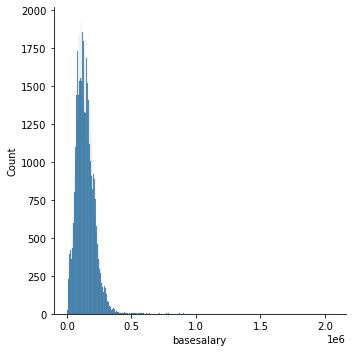

In [261]:
import seaborn as sns

print(df['basesalary'].skew())
sns.displot(df['basesalary'])

basesalary is skewed to the left.

In [ ]:
pd.DataFrame(df[df['stockgrantvalue'] < 10000].sort_values(by='stockgrantvalue')).tail(60)

In [321]:
df['stockgrantvalue'] = df['stockgrantvalue'].apply(lambda x: x * 1000 if (x < 1000) else x)
df.describe()

C:\Users\USER\AppData\Local\Temp/ipykernel_9708/3061838226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stockgrantvalue'] = df['stockgrantvalue'].apply(lambda x: x * 1000 if (x < 1000) else x)


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,rowNumber,year
count,6.034500e+04,60345.000000,60345.000000,6.034500e+04,6.034500e+04,60345.000000,60345.000000,60345.000000
mean,3.296194e+03,7.173784,2.679675,1.415874e+05,5.315018e+04,251.540873,43000.067412,2020.114989
std,3.950490e+04,6.432553,3.519011,7.108476e+04,8.613709e+04,3778.816687,23987.579330,0.877404
min,3.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2017.000000
25%,1.240000e+02,3.000000,0.000000,9.300000e+04,1.000000e+03,3.000000,22450.000000,2020.000000
50%,1.880000e+02,5.000000,1.000000,1.330000e+05,2.400000e+04,14.000000,43690.000000,2020.000000
75%,2.740000e+02,10.000000,4.000000,1.810000e+05,6.500000e+04,27.000000,63733.000000,2021.000000
max,3.386013e+06,90.000000,90.000000,2.057772e+06,3.140803e+06,384026.000000,83875.000000,2021.000000


4.686697693698049


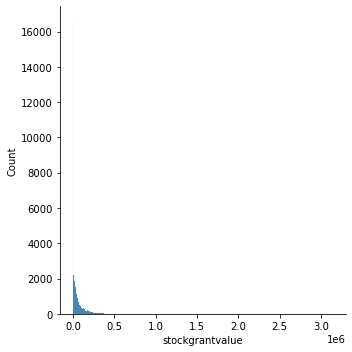

In [323]:
print(df['stockgrantvalue'].skew())
sns.displot(df['stockgrantvalue'])

In [322]:
df['bonus'] = df['bonus'].apply(lambda x: x * 1000 if (x < 1000) else x)
df.describe()

C:\Users\USER\AppData\Local\Temp/ipykernel_9708/3329166054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bonus'] = df['bonus'].apply(lambda x: x * 1000 if (x < 1000) else x)


,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,rowNumber,year
count,6.034500e+04,60345.000000,60345.000000,6.034500e+04,6.034500e+04,60345.000000,60345.000000,60345.000000
mean,3.296194e+03,7.173784,2.679675,1.415874e+05,5.315018e+04,20150.140873,43000.067412,2020.114989
std,3.950490e+04,6.432553,3.519011,7.108476e+04,8.613709e+04,28891.612626,23987.579330,0.877404
min,3.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,2017.000000
25%,1.240000e+02,3.000000,0.000000,9.300000e+04,1.000000e+03,3000.000000,22450.000000,2020.000000
50%,1.880000e+02,5.000000,1.000000,1.330000e+05,2.400000e+04,13000.000000,43690.000000,2020.000000
75%,2.740000e+02,10.000000,4.000000,1.810000e+05,6.500000e+04,27000.000000,63733.000000,2021.000000
max,3.386013e+06,90.000000,90.000000,2.057772e+06,3.140803e+06,981000.000000,83875.000000,2021.000000


6.905536107962811


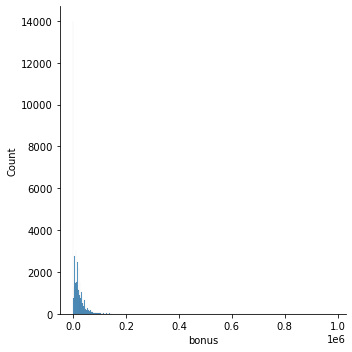

In [324]:
print(df['bonus'].skew())
sns.displot(df['bonus'])

### Explore data

Data exploration must be aligned with the project objective - to predict the annual salary (including base pay, stock grants and estimated bonuses) for data science and STEM roles using data from [LEVELS.FYI](https://www.levels.fyi/).

Hence we prioritise the following questions:
1. What are the features that will affect annual compensation offered?
2. How does those features change wrt annual compensation offered?
3. What are the irrelevant (and uncorrelated) features that we can drop?

From here, we can extend to these questions:
1. Many people thinks that tech companies pays well above average and cost of living. Is this true?
2. For the same position and job level, does 2021 compensation higher than in 2017? If yes, is it aligned with inflation?
3. Are women underpaid in these companies? If yes, by how much?
4. Does different company offer differently for the same position or there is no disparity?
5. Does years in company affect total compensation? If yes, which part of compensation was affected - base salary, stock value or bonus?
6. For the same position or job level, does location affect total compensation regardless of gender?

Good to know:
1. What are the factors impacting the salary of a data scientist?
2. What is the salary trend for data scientist? and its comparison to living cost?
3. What is the predicted salary for data scientist in next 5 years?

## References

Best Jobs in America 2022 Employees' Choice (2022). Glassdoor. Retrived on May 3, 2022 from
https://www.glassdoor.com/List/Best-Jobs-in-America-LST_KQ0,20.htm

Data Scientist Salary-The Ultimate Guide for 2021 (2022). ProjectPro. Retrived on May 3, 2022 from https://www.projectpro.io/article/data-scientist-salary-the-ultimate-guide-for-2021/218

Davenport, T H. & Patil, DJ. (2012). Data Scientist: The Sexiest Job of the 21st Century. *HARVARD BUSINESS REVIEW*. Retrieved on 3 May, 2022 from https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century

Martin, I., Mariello, A., Battiti, R. & Hernandez, J A. (2018). Salary Prediction in the IT Job Market with Few High-Dimensional Samples: A Spanish Case Study. *International Journal of Computational Intelligence Systems, 11, 1192-1209*. https://libkey.io/libraries/2611/articles/225996272/full-text-file   
    
    
Miller, H., Seckel, Ea., White, CL., et al. (2021). Gender-based salary differences in academic medicine: a retrospective review of data from six public medical centers in the Western USA. http://dx.doi.org/10.1136/bmjopen-2021-059216
    
Seaman, A. (2021). LinkedIn Jobs on the Rise: 15 opportunities that are in demand and hiring now. Retrieved on May 3, 2022 from https://www.linkedin.com/pulse/linkedin-jobs-rise-15-opportunities-demand-hiring-now-andrew-seaman/